# NWChem

In [1]:
%matplotlib inline
import os, bz2
import exatomic
from exatomic import nwchem


def decompress():
    """Helper function for decompressing example."""
    path = os.path.abspath(os.path.join(os.path.abspath(exatomic.__file__), "../static/nwchem/nw-ch3nh2-augccpvdz.out.bz2"))
    with bz2.open(path) as f:
        return nwchem.Output(f.read().decode("utf-8"))

In [2]:
# Open the output file
out = decompress()    # Typically out = nwchem.Output("path to output file")
len(out)

2963

In [3]:
out.parse_atom()
out.atom

,tag,Z,x,y,z,symbol,Zeff,frame
atom,,,,,,,,
0,C,6,1.409566,0.020987,0.000000,C,6,0
1,N,7,-1.363889,-0.135772,0.000000,N,7,0
2,H,1,1.969196,2.003298,0.000000,H,1,0
3,H,1,2.134053,-0.913404,1.686645,H,1,0
4,H,1,2.134053,-0.913404,-1.686645,H,1,0
5,H,1,-2.035202,0.730039,-1.562856,H,1,0
6,H,1,-2.035202,0.730039,1.562856,H,1,0


In [4]:
out.parse_basis_set()
out.basis_set.tail()

,shell,L,alpha,d,set,frame,N,Nd
function,,,,,,,,
52,0,0,0.44460,0.478148,2,0,0.388050,0.185545
53,1,0,0.12200,1.000000,2,0,0.147123,0.147123
54,2,0,0.02974,1.000000,2,0,0.051041,0.051041
55,3,1,0.72700,1.000000,2,0,0.956881,0.956881
56,4,1,0.14100,1.000000,2,0,0.123158,0.123158


In [5]:
out.parse_basis_set_order()
out.basis_set_order.tail()

,center,shell,L,ml,frame
86,6,3,1,-1,0
87,6,3,1,0,0
88,6,4,1,1,0
89,6,4,1,-1,0
90,6,4,1,0,0


In [6]:
out.parse_frame()
out.frame

,atom_count,total_energy
frame,,
0,7,-95.229252


In [7]:
out.parse_momatrix()
out.momatrix.shape

(8281, 4)

In [8]:
out.parse_orbital()
out.orbital.tail()

,energy,frame,occupation,vector,x,y,z,spin,group
orbital,,,,,,,,,
86,3.034495,0,0.0,86,0.079,-3.900000e-14,-3.900000e-14,0,0
87,3.059546,0,0.0,87,-0.370,3.000000e-13,3.000000e-13,0,0
88,3.074835,0,0.0,88,0.095,-6.900000e-13,-6.900000e-13,0,0
89,3.380757,0,0.0,89,-0.800,1.800000e-13,1.800000e-13,0,0
90,3.634046,0,0.0,90,-0.670,-2.200000e-13,-2.200000e-13,0,0


In [9]:
uni = out.to_universe()

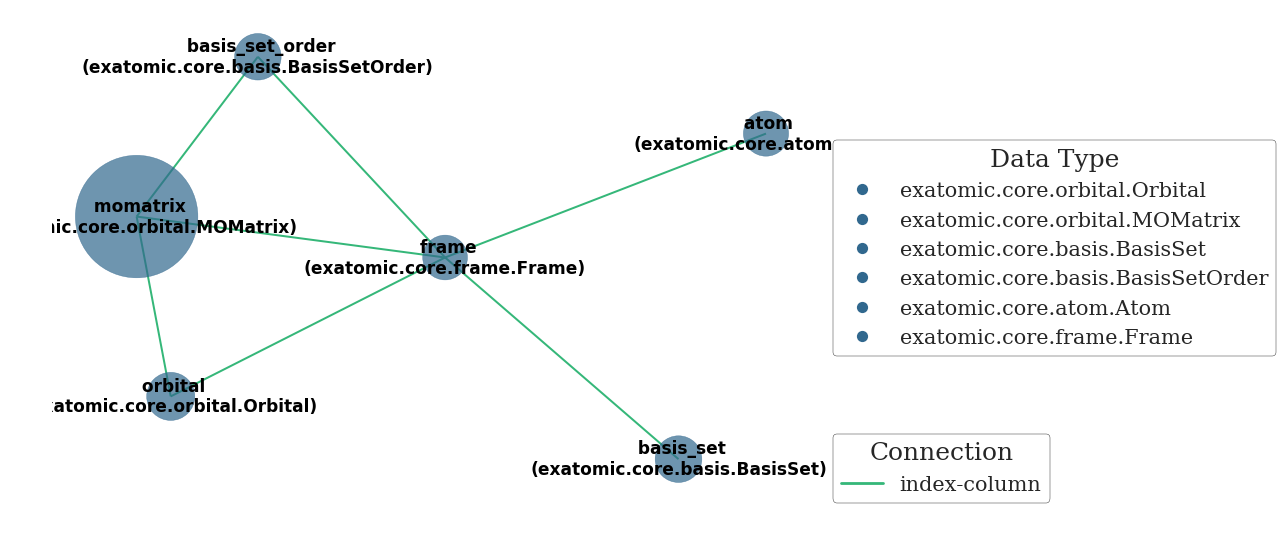

In [10]:
uni.network()

In [11]:
uni.orbital[uni.orbital['occupation'] != 0.0]

,energy,frame,occupation,vector,x,y,z,spin,group
orbital,,,,,,,,,
0,-15.544670,0,2.0,0,-0.72,-3.700000e-15,-3.700000e-15,0,0
1,-11.248320,0,2.0,1,0.75,1.300000e-15,1.300000e-15,0,0
2,-1.170266,0,2.0,2,-0.45,1.200000e-13,1.200000e-13,0,0
3,-0.893624,0,2.0,3,0.46,1.200000e-13,1.200000e-13,0,0
4,-0.668444,0,2.0,4,-0.43,-3.800000e-13,-3.800000e-13,0,0
5,-0.597788,0,2.0,5,0.40,1.100000e-13,1.100000e-13,0,0
6,-0.555492,0,2.0,6,0.18,9.200000e-13,9.200000e-13,0,0
7,-0.522872,0,2.0,7,0.51,-1.800000e-12,-1.800000e-12,0,0
8,-0.385592,0,2.0,8,-0.45,-1.600000e-13,-1.600000e-13,0,0


In [15]:
uni.add_molecular_orbitals(field_params={'nr': 51, 'rmin': -10, 'rmax': 10}, vector=[8, 9])

frame 0
Evaluating 91 basis functions once.
Timing: compute MOs - 0.74s


In [16]:
exatomic.UniverseWidget(uni)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
